<h1>Ejercicio 1: Maximizar una función matemática </h1>

<h3> Implementación de librerias </h3>

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

<h3> Definición del fitness</h3>

In [29]:
def fitness(individuo):
    x = int("".join(str(bit) for bit in individuo), 2)
    return x**2

<h3> Creación de la población </h3>

In [30]:
def crear_poblacion(tamano_poblacion, longitud_individuo):
    return [[random.randint(0,1) for _ in range(longitud_individuo)] for _ in range(tamano_poblacion)]

poblacion = crear_poblacion(6, 5)
print("Población inicial:", poblacion)


Población inicial: [[1, 0, 1, 0, 0], [1, 1, 1, 0, 1], [0, 1, 1, 1, 1], [1, 0, 0, 0, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 1]]


<h3> Proceso de selección </h3>

In [31]:
def seleccion(poblacion):
    fitness_total = sum([fitness(ind) for ind in poblacion])
    probabilidad = [fitness(ind)/fitness_total for ind in poblacion]
    return poblacion[np.random.choice(len(poblacion), p=probabilidad)]


<h3> Proceso de cruzamiento </h3>

In [32]:
def cruzamiento(padre1, padre2):
    punto = random.randint(1, len(padre1)-1)
    hijo1 = padre1[:punto] + padre2[punto:]
    hijo2 = padre2[:punto] + padre1[punto:]
    return hijo1, hijo2


<h3> Proceso de mutación </h3>

In [33]:
def mutacion(individuo, tasa=0.1):
    return [bit if random.random() > tasa else 1-bit for bit in individuo]


<h3> Algoritmos Geneticos </h3>

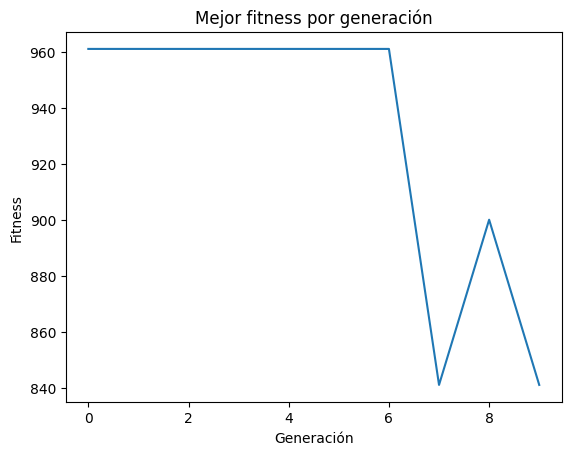

Mejor solución encontrada: [1, 1, 1, 0, 1] Fitness: 841


In [34]:
def algoritmo_genetico(generaciones=10, tamano_poblacion=6, longitud_individuo=5):
    poblacion = crear_poblacion(tamano_poblacion, longitud_individuo)
    historial_max = []

    for _ in range(generaciones):
        nueva_poblacion = []
        for _ in range(tamano_poblacion // 2):
            padre1 = seleccion(poblacion)
            padre2 = seleccion(poblacion)
            hijo1, hijo2 = cruzamiento(padre1, padre2)
            hijo1 = mutacion(hijo1)
            hijo2 = mutacion(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])
        poblacion = nueva_poblacion
        mejor = max(poblacion, key=fitness)
        historial_max.append(fitness(mejor))

    plt.plot(historial_max)
    plt.title("Mejor fitness por generación")
    plt.xlabel("Generación")
    plt.ylabel("Fitness")
    plt.show()

    return max(poblacion, key=fitness)

mejor_solucion = algoritmo_genetico()
print("Mejor solución encontrada:", mejor_solucion, "Fitness:", fitness(mejor_solucion))



<h1>Ejercicio 2: Maximizar la cantidad de unos en un individuo binario </h1>

In [35]:
def fitness(individuo):
    return sum(individuo)


In [36]:
def crear_poblacion(tamano_poblacion, longitud_individuo):
    return [[random.randint(0,1) for _ in range(longitud_individuo)] for _ in range(tamano_poblacion)]

poblacion = crear_poblacion(6, 10)
print("Población inicial:", poblacion)


Población inicial: [[0, 1, 0, 0, 0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]]


In [37]:
def seleccion_torneo(poblacion, k=3):
    participantes = random.sample(poblacion, k)
    return max(participantes, key=fitness)


In [38]:
def cruzamiento(padre1, padre2):
    punto = random.randint(1, len(padre1)-1)
    hijo1 = padre1[:punto] + padre2[punto:]
    hijo2 = padre2[:punto] + padre1[punto:]
    return hijo1, hijo2


In [39]:
def mutacion(individuo, tasa=0.05):
    return [bit if random.random() > tasa else 1-bit for bit in individuo]


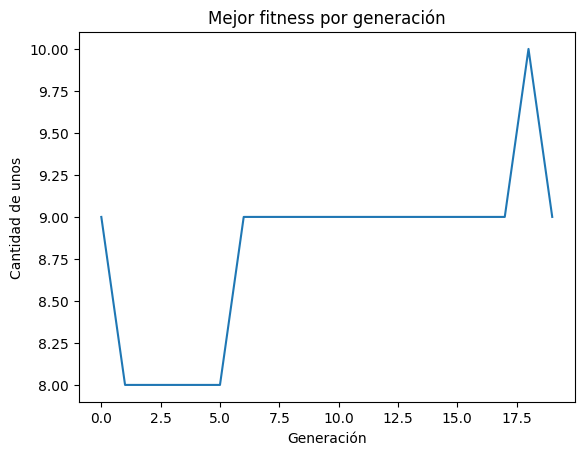

Mejor solución encontrada: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Cantidad de unos: 9


In [40]:
def algoritmo_genetico_max_unos(generaciones=20, tamano_poblacion=6, longitud_individuo=10):
    poblacion = crear_poblacion(tamano_poblacion, longitud_individuo)
    historial_max = []

    for _ in range(generaciones):
        nueva_poblacion = []
        for _ in range(tamano_poblacion // 2):
            padre1 = seleccion_torneo(poblacion)
            padre2 = seleccion_torneo(poblacion)
            hijo1, hijo2 = cruzamiento(padre1, padre2)
            hijo1 = mutacion(hijo1)
            hijo2 = mutacion(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])
        poblacion = nueva_poblacion
        mejor = max(poblacion, key=fitness)
        historial_max.append(fitness(mejor))

    plt.plot(historial_max)
    plt.title("Mejor fitness por generación")
    plt.xlabel("Generación")
    plt.ylabel("Cantidad de unos")
    plt.show()

    return max(poblacion, key=fitness)

mejor_solucion = algoritmo_genetico_max_unos()
print("Mejor solución encontrada:", mejor_solucion, "Cantidad de unos:", fitness(mejor_solucion))
